<a href="https://colab.research.google.com/github/megha988/Emotional-Recogniton-using-EEG-signal/blob/main/Emotional_Recognition_using_EEG_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
uploaded = files.upload() 

Saving participant_ratings.csv to participant_ratings.csv


In [ ]:
df=pd.read_csv('participant_ratings.csv')



 **DEAP Dataset Exploration**


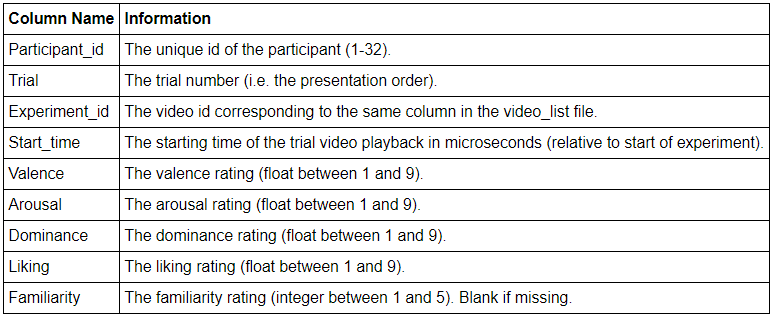

In [ ]:
df

,Participant_id,Trial,Experiment_id,Start_time,Valence,Arousal,Dominance,Liking,Familiarity
0,1,1,5,1695918,6.96,3.92,7.19,6.05,4.0
1,1,2,18,2714905,7.23,7.15,6.94,8.01,4.0
2,1,3,4,3586768,4.94,6.01,6.12,8.06,4.0
3,1,4,24,4493800,7.04,7.09,8.01,8.22,4.0
4,1,5,20,5362005,8.26,7.91,7.19,8.13,1.0
...,...,...,...,...,...,...,...,...,...
1275,32,36,1,30916115,8.13,4.83,9.00,4.87,2.0
1276,32,37,18,31703107,8.03,7.06,8.96,8.18,5.0
1277,32,38,3,32482079,8.05,7.09,8.86,7.08,5.0
1278,32,39,25,33248922,4.01,7.17,8.01,6.94,2.0


In [ ]:
!pip install git+https://github.com/forrestbao/pyeeg.git
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math

from sklearn import svm
from sklearn.preprocessing import normalize

import os
import time

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-w3k7z5xh
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-w3k7z5xh
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28123 sha256=92ec301daaa4162411feda036af88ac38ec0a2821c43e8adaf0a58f2b51cd41a
  Stored in directory: /tmp/pip-ephem-wheel-cache-68lwopfc/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg


In [ ]:
import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical 
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D
from keras.optimizers import SGD
#import cv2, numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
os.getcwd()
os.chdir('/content/drive/My Drive')

In [ ]:

import pickle as cPickle
# Load the entire 32 patients accesible by number.
for i in range(1,32):
  x[i] = cPickle.load(open("/content/drive/My Drive/EEG/s"+str(i)+".dat", 'rb'),encoding="latin1")
  print(x[i]['labels'])
  print(x[i]['data'])



[[7.71 7.6  6.9  7.83]
 [8.1  7.31 7.28 8.47]
 [8.58 7.54 9.   7.08]
 [4.94 6.01 6.12 8.06]
 [6.96 3.92 7.19 6.05]
 [8.27 3.92 7.   8.03]
 [7.44 3.73 7.08 7.04]
 [7.32 2.55 6.32 5.87]
 [4.04 3.29 3.62 5.99]
 [1.99 4.86 2.04 7.09]
 [2.99 2.36 3.63 6.24]
 [2.71 2.77 3.4  7.35]
 [1.95 3.12 2.87 6.18]
 [4.18 2.24 3.04 5.04]
 [3.17 8.08 2.91 5.04]
 [6.81 7.44 8.15 7.14]
 [2.46 6.91 6.77 6.41]
 [7.23 7.15 6.94 8.01]
 [7.17 8.   8.1  6.79]
 [8.26 7.91 7.19 8.13]
 [9.   7.95 8.37 7.86]
 [7.09 2.08 7.06 7.37]
 [8.15 3.01 7.37 7.9 ]
 [7.04 7.09 8.01 8.22]
 [8.86 7.21 8.65 7.21]
 [7.28 7.27 7.41 8.24]
 [7.35 6.95 7.03 7.29]
 [3.88 3.35 4.01 7.87]
 [1.36 2.27 3.   8.14]
 [2.08 2.99 3.22 7.33]
 [3.03 8.14 2.86 8.04]
 [2.28 8.   3.27 3.95]
 [3.81 3.85 4.78 5.13]
 [2.28 7.09 7.28 6.92]
 [2.06 8.15 8.05 5.18]
 [2.9  6.92 6.5  3.87]
 [2.31 6.88 3.1  6.77]
 [3.33 7.18 6.54 6.62]
 [3.24 6.18 7.87 6.15]
 [5.1  7.12 6.17 5.97]]
[[[ 9.48231681e-01  1.65333533e+00  3.01372577e+00 ... -2.82648937e+00
   -4.47

[[7.71 7.6  6.9  7.83]
 [8.1  7.31 7.28 8.47]
 [8.58 7.54 9.   7.08]
 [4.94 6.01 6.12 8.06]
 [6.96 3.92 7.19 6.05]
 [8.27 3.92 7.   8.03]
 [7.44 3.73 7.08 7.04]
 [7.32 2.55 6.32 5.87]
 [4.04 3.29 3.62 5.99]
 [1.99 4.86 2.04 7.09]
 [2.99 2.36 3.63 6.24]
 [2.71 2.77 3.4  7.35]
 [1.95 3.12 2.87 6.18]
 [4.18 2.24 3.04 5.04]
 [3.17 8.08 2.91 5.04]
 [6.81 7.44 8.15 7.14]
 [2.46 6.91 6.77 6.41]
 [7.23 7.15 6.94 8.01]
 [7.17 8.   8.1  6.79]
 [8.26 7.91 7.19 8.13]
 [9.   7.95 8.37 7.86]
 [7.09 2.08 7.06 7.37]
 [8.15 3.01 7.37 7.9 ]
 [7.04 7.09 8.01 8.22]
 [8.86 7.21 8.65 7.21]
 [7.28 7.27 7.41 8.24]
 [7.35 6.95 7.03 7.29]
 [3.88 3.35 4.01 7.87]
 [1.36 2.27 3.   8.14]
 [2.08 2.99 3.22 7.33]
 [3.03 8.14 2.86 8.04]
 [2.28 8.   3.27 3.95]
 [3.81 3.85 4.78 5.13]
 [2.28 7.09 7.28 6.92]
 [2.06 8.15 8.05 5.18]
 [2.9  6.92 6.5  3.87]
 [2.31 6.88 3.1  6.77]
 [3.33 7.18 6.54 6.62]
 [3.24 6.18 7.87 6.15]
 [5.1  7.12 6.17 5.97]]
[[[ 9.48231681e-01  1.65333533e+00  3.01372577e+00 ... -2.82648937e+00
   -4.47

In [ ]:
channel = [1,2,3,4,6,11,13,17,19,20,21,25,29,31] #14 Channels chosen to fit Emotiv Epoch+
band = [4,8,12,16,25,45] #5 bands
window_size = 256 #Averaging band power of 2 sec
step_size = 16 #Each 0.125 sec update once
sample_rate = 128 #Sampling rate of 128 Hz
subjectList = ['01','02','03']
#List of subjects

In [ ]:

def FFT_Processing (sub, channel, band, window_size, step_size, sample_rate):
    '''
    arguments:  string subject
                list channel indice
                list band
                int window size for FFT
                int step size for FFT
                int sample rate for FFT
    return:     void
    '''
    meta = []
    with open("/content/drive/My Drive/EEG/s" + sub + '.dat', 'rb') as file:

        subject = pickle.load(file, encoding='latin1')
        for i in range (0,40):
            # loop over 0-39 trails
            data = subject["data"][i]
            labels = subject["labels"][i]
            start = 0;

            while start + window_size < data.shape[1]:
                meta_array = []
                meta_data = [] #meta vector for analysis
                for j in channel:
                    X = data[j][start : start + window_size] #Slice raw data over 2 sec, at interval of 0.125 sec
                    Y = pe.bin_power(X, band, sample_rate) #FFT over 2 sec of channel j, in seq of theta, alpha, low beta, high beta, gamma
                    meta_data = meta_data + list(Y[0])

                meta_array.append(np.array(meta_data))
                meta_array.append(labels)

                meta.append(np.array(meta_array))    
                start = start + step_size
                
        meta = np.array(meta)
        np.save('/content/drive/My Drive/EEG/s' + sub, meta, allow_pickle=True, fix_imports=True)

In [ ]:
for subjects in subjectList:
    FFT_Processing (subjects, channel, band, window_size, step_size, sample_rate)

In [ ]:
data_training = []
label_training = []
data_testing = []
label_testing = []

for subjects in subjectList:

    with open('/content/drive/My Drive/EEG/s' + subjects + '.npy', 'rb') as file:
      sub = np.load(file,allow_pickle=True)
      for i in range (0,sub.shape[0]):
        if i % 5 == 0:
          data_testing.append(sub[i][0])
          label_testing.append(sub[i][1])
        else:
          data_training.append(sub[i][0])
          label_training.append(sub[i][1])

np.save('/content/drive/My Drive/EEG/data_training', np.array(data_training), allow_pickle=True, fix_imports=True)
np.save('/content/drive/My Drive/EEG/label_training', np.array(label_training), allow_pickle=True, fix_imports=True)
print("training dataset:", np.array(data_training).shape, np.array(label_training).shape)

np.save('/content/drive/My Drive/EEG/data_testing', np.array(data_testing), allow_pickle=True, fix_imports=True)
np.save('/content/drive/My Drive/EEG/label_testing', np.array(label_testing), allow_pickle=True, fix_imports=True)
print("testing dataset:", np.array(data_testing).shape, np.array(label_testing).shape)

training dataset: (46848, 70) (46848, 4)
testing dataset: (11712, 70) (11712, 4)


In [ ]:

with open('/content/drive/My Drive/EEG/data_training.npy', 'rb') as fileTrain:
    X  = np.load(fileTrain)
    
with open('/content/drive/My Drive/EEG/label_training.npy', 'rb') as fileTrainL:
    Y  = np.load(fileTrainL)
    
X = normalize(X)
Z = np.ravel(Y[:, [3]])

Arousal_Train = np.ravel(Y[:, [0]])
Valence_Train = np.ravel(Y[:, [1]])
Domain_Train = np.ravel(Y[:, [2]])
Like_Train = np.ravel(Y[:, [3]])

In [ ]:
X.shape

(46848, 70)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(Z)
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train.shape

(46848, 10)

In [ ]:
x_train = np.array(X[:])

In [ ]:
with open('/content/drive/My Drive/EEG/data_testing.npy', 'rb') as fileTrain:
    M  = np.load(fileTrain)
    
with open('/content/drive/My Drive/EEG/label_testing.npy', 'rb') as fileTrainL:
    N  = np.load(fileTrainL)

M = normalize(M)
L = np.ravel(N[:, [3]])

Arousal_Test = np.ravel(N[:, [0]])
Valence_Test = np.ravel(N[:, [1]])
Domain_Test = np.ravel(N[:, [2]])
Like_Test = np.ravel(N[:, [3]])

In [ ]:
x_test = np.array(M[:])

In [ ]:
from keras.utils import to_categorical
y_test = to_categorical(L)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
x_train.shape

(46848, 70, 1)

In [ ]:
batch_size = 256
num_classes = 10
epochs = 200
input_shape=(x_train.shape[1], 1)

In [ ]:
print(input_shape)

(70, 1)


In [ ]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

In [ ]:
model = Sequential()
intput_shape=(x_train.shape[1], 1)
model.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128,kernel_size=3,padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(64,kernel_size=3,padding = 'same', activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 70, 128)           512       
_________________________________________________________________
batch_normalization (BatchNo (None, 70, 128)           512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 35, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 35, 128)           49280     
_________________________________________________________________
batch_normalization_1 (Batch (None, 35, 128)           512       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 17, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 17, 64)            2

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,  
          verbose=1,validation_data=(x_test,y_test))

Epoch 1/200
183/183 [==============================] - 27s 143ms/step - loss: 1.8750 - accuracy: 0.2906 - val_loss: 1.7090 - val_accuracy: 0.3380
Epoch 2/200
183/183 [==============================] - 26s 143ms/step - loss: 1.5307 - accuracy: 0.3741 - val_loss: 1.4099 - val_accuracy: 0.4171
Epoch 3/200
183/183 [==============================] - 26s 142ms/step - loss: 1.3924 - accuracy: 0.4309 - val_loss: 1.1876 - val_accuracy: 0.5194
Epoch 4/200
183/183 [==============================] - 26s 141ms/step - loss: 1.2757 - accuracy: 0.4825 - val_loss: 1.0805 - val_accuracy: 0.5632
Epoch 5/200
183/183 [==============================] - 26s 141ms/step - loss: 1.2054 - accuracy: 0.5176 - val_loss: 1.0374 - val_accuracy: 0.5801
Epoch 6/200
183/183 [==============================] - 26s 141ms/step - loss: 1.1230 - accuracy: 0.5464 - val_loss: 0.9694 - val_accuracy: 0.6069
Epoch 7/200
183/183 [==============================] - 26s 142ms/step - loss: 1.0831 - accuracy: 0.5662 - val_loss: 0.9724 -

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

366/366 [==============================] - 3s 8ms/step - loss: 0.4289 - accuracy: 0.8803
Test loss: 0.4288928806781769
Test accuracy: 0.8802937269210815


In [ ]:
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt
import numpy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


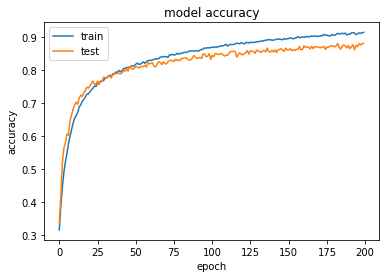

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

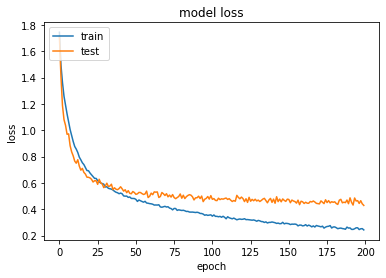

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()